# **Classificação de Customers com Machine Learning**

Cada vez mais empresas que trabalham com cobranças e gestão de pagamentos utilizam técnicas de análise de dados e aprendizado de máquina para melhorar suas operações. Algumas aplicações incluem a previsão de inadimplência, otimização de estratégias de cobrança e personalização da abordagem para cada cliente. Neste projeto, abordaremos a classificação de *customers* com base em seus padrões de pagamento.

O comportamento de pagamento dos *customers* influencia diretamente as taxas de inadimplência e a eficiência dos processos de cobrança. Para entender melhor esses padrões, trabalharemos com um conjunto de dados contendo informações sobre *companies* (nossos clientes) e *payments* (histórico de cobranças feitas para *customers* e seus status). A partir desses dados, desenvolveremos um modelo de *machine learning* capaz de classificar os *customers* em diferentes categorias de pagadores.

## **Objetivo**

O objetivo deste projeto é treinar, testar e avaliar um modelo de *machine learning* capaz de classificar *customers* de acordo com seu comportamento de pagamento. Com essa classificação, poderemos auxiliar as *companies* na redução da inadimplência e na otimização de suas estratégias de cobrança.

Para isso, passaremos pelas seguintes etapas:

1. **Exploração e limpeza dos dados:** Identificação de padrões, valores ausentes e inconsistências nos dados.
2. **Engenharia de atributos (*feature engineering*):** Criação de novas variáveis relevantes para a classificação dos *customers*.
3. **Preparação dos dados:** Normalização e transformação das variáveis para melhor desempenho do modelo.
4. **Definição de categorias de pagadores:** Segmentação dos *customers* em categorias como:
    - **Bons Pagadores**
    - **Pagadores Duvidosos**
    - **Maus Pagadores**
    - **Pagadores Esquecidos**
    - **Novos Pagadores**
5. **Seleção e treinamento do modelo:** Avaliação de diferentes algoritmos de *machine learning* e escolha do mais adequado.
6. **Validação do modelo:** Teste com dados de validação e avaliação de métricas como acurácia, *F1-score* e matriz de confusão.
7. **Implantação via API:** Desenvolvimento de uma API para consulta da classificação de *customers* em tempo real.

## **Resultados Esperados**

Com a implementação deste modelo, esperamos atingir os seguintes resultados:

- **Redução da taxa de inadimplência para menos de 5%.**
- **Melhoria no atendimento ao cliente, com abordagens personalizadas de cobrança.**
- **Maior previsibilidade do fluxo de caixa para as *companies*.**

Este projeto fornecerá uma ferramenta robusta para otimizar os processos de cobrança e melhorar a relação entre *companies* e *customers*, aumentando a eficiência operacional e reduzindo riscos financeiros.

## **Análise Exploratória e Limpeza dos Dados**
Vamos começar instalando e importando tudo o que for necessário. Em seguida, vamos configurar o notebook e ler os dados em um DataFrame.

In [278]:
!pip install scikit-learn==1.4.0 xgboost matplotlib pandas numpy seaborn imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [279]:
# Importando pacotes e bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
)
from scipy.stats import ks_2samp
from sklearn.compose import make_column_transformer
import pickle
from sklearn.compose import ColumnTransformer


# Configurando o notebook
sns.set()
%matplotlib inline

In [280]:
# Lendo os dados de treino e teste
# File paths
payments_file = "../data/payments_mle.csv"
companies_file = "../data/company_profiling_mle.csv"

# Load the CSV files
payments_df = pd.read_csv(payments_file)
companies_df = pd.read_csv(companies_file)

In [281]:
payments_df.head()

,company_id,company_name,company_document,company_trade_name,customer_id,customer_name,customer_trade_name,parent_type,parent_id,payment_number,...,os_code,os_identifier,by_mail,by_whatsapp,fees,fine,paid_at,paid_method,manual,billing_number
0,83 0b f4 f3 45 67 54 39 74 c5 43 31 ae 73 a3 0...,40 f9 0d a5 a9 d9 29 33 ac 84 f2 9b 3f 86 b0 0...,37 2a 52 fa 18 60 9c 5c 72 47 98 27 bd 58 45 8...,40 f9 0d a5 a9 d9 29 33 ac 84 f2 9b 3f 86 b0 0...,02 60 80 35 3c d3 09 5f be 20 e5 8d ed 3d 2e f...,c4 52 91 30 34 b0 96 83 05 98 61 da 5c 3b a1 1...,c4 52 91 30 34 b0 96 83 05 98 61 da 5c 3b a1 1...,billing,f02f0294-ce57-431c-b008-483d92dce72a,e5 fa 90 b0 7e 55 6e 80 20 06 2b f0 f8 30 cc 5...,...,e3 b0 c4 42 98 fc 1c 14 9a fb f4 c8 99 6f b9 2...,e3 b0 c4 42 98 fc 1c 14 9a fb f4 c8 99 6f b9 2...,True,True,0.00,0.0,2025-01-05 15:04:28.000,generic,NaN,44 b5 2b 63 14 51 4a 9e be e1 19 c0 39 ad af 2...
1,b9 b4 d3 32 b2 62 20 af f7 26 e3 3f cf b4 64 1...,fb 76 cc 4a 25 c5 45 65 72 79 9b 9f 25 9f 4d 7...,e4 9d e1 3d 2b bd a8 b5 84 50 25 8b 65 45 9e 4...,e6 26 0e 20 3a a4 18 a7 0f 9e f3 68 cd 5d fa 7...,ed 0b 83 5b 92 a2 3e 21 44 24 b7 28 7f c5 5b 7...,cb f7 6d dd a6 e6 e9 47 09 af 25 1f ab a4 04 4...,cb f7 6d dd a6 e6 e9 47 09 af 25 1f ab a4 04 4...,billing,3ba1690b-3ee7-4937-87c9-9364c689dc0b,40 e9 bd 2a 81 7c aa 6f 92 ef c3 c1 dd fb a3 8...,...,e3 b0 c4 42 98 fc 1c 14 9a fb f4 c8 99 6f b9 2...,e3 b0 c4 42 98 fc 1c 14 9a fb f4 c8 99 6f b9 2...,True,True,0.03,2.0,2024-12-17 17:47:57.000,generic,NaN,eb 17 84 07 43 4f ec 32 69 0e 43 b9 81 3c 64 b...
2,3f 7a 5c a6 fa 4c 9f f8 6c ab d2 72 1b 90 a6 2...,dc 69 8b 2d 91 06 68 f1 03 f8 7e 89 87 e7 95 c...,c4 ce b5 1a 42 43 79 50 23 05 f9 0d 37 9a ea 3...,dc 69 8b 2d 91 06 68 f1 03 f8 7e 89 87 e7 95 c...,b4 ad 5e 26 79 63 c7 c3 ec 7b 8a 88 5e e7 26 5...,77 0d ed 1b cd 12 54 ff ca 44 fb 52 74 c5 b7 1...,77 0d ed 1b cd 12 54 ff ca 44 fb 52 74 c5 b7 1...,billing,ee993458-d9dd-428b-b995-f542b2bef264,96 71 57 09 57 a0 ac df 5a 82 a8 2e e3 b7 32 5...,...,e3 b0 c4 42 98 fc 1c 14 9a fb f4 c8 99 6f b9 2...,e3 b0 c4 42 98 fc 1c 14 9a fb f4 c8 99 6f b9 2...,True,True,0.98,2.0,2024-11-11 12:00:00.000,NaN,NaN,c2 6f 6d 0a 98 05 1a 0c e6 f2 63 c1 97 3b d8 1...
3,90 67 43 78 39 4d 72 52 47 d5 56 00 6b 1d b3 5...,db 00 ac ad 79 5c 85 7f c9 89 a7 b7 ad 52 84 5...,94 08 68 68 55 46 70 e7 52 13 1c 3c 3f 71 a5 9...,db 00 ac ad 79 5c 85 7f c9 89 a7 b7 ad 52 84 5...,54 df 75 cf 73 13 2a 0f f8 b6 0e 83 cd 09 b0 3...,99 d2 25 b5 08 09 21 b2 3b 9c 48 90 09 ef 30 2...,99 d2 25 b5 08 09 21 b2 3b 9c 48 90 09 ef 30 2...,billing,401ae05c-a670-4ac4-8e8c-c7413dc49095,a5 64 91 9f 33 fb e9 83 fa 2f 7c 8e 49 a7 08 0...,...,e3 b0 c4 42 98 fc 1c 14 9a fb f4 c8 99 6f b9 2...,e3 b0 c4 42 98 fc 1c 14 9a fb f4 c8 99 6f b9 2...,True,True,1.00,2.0,NaN,NaN,NaN,d8 4d 2c 23 93 68 fc 9f bc 11 34 ba 2c 48 0b 4...
4,3f 7a 5c a6 fa 4c 9f f8 6c ab d2 72 1b 90 a6 2...,dc 69 8b 2d 91 06 68 f1 03 f8 7e 89 87 e7 95 c...,c4 ce b5 1a 42 43 79 50 23 05 f9 0d 37 9a ea 3...,dc 69 8b 2d 91 06 68 f1 03 f8 7e 89 87 e7 95 c...,d5 52 50 e5 07 2f ec da bb de a2 67 d6 47 29 e...,05 9b 12 90 35 a7 ca 6c a8 78 57 cb c7 fc fb 6...,05 9b 12 90 35 a7 ca 6c a8 78 57 cb c7 fc fb 6...,billing,b320a402-490b-47bf-922d-c37b1f90cb7c,6a f5 15 b0 68 9a d5 07 86 1a 0b 51 5d da 6d 3...,...,e3 b0 c4 42 98 fc 1c 14 9a fb f4 c8 99 6f b9 2...,e3 b0 c4 42 98 fc 1c 14 9a fb f4 c8 99 6f b9 2...,True,True,0.99,2.0,NaN,NaN,NaN,c9 d5 47 e3 74 1c 51 cd f6 a2 0c f5 98 93 b9 4...


In [282]:
companies_df.head()

,company_id,consider_for_revenue,first_active_date,last_active_date,is_considered_for_recovery,is_cosidered_for_subscription,is_considered_for_wapp_messages_sent,recovery_tax,whatsapp_tax,monthly_fee_tax,...,is_trial_m_2,payments_issued_m-1,payments_issued_with_due_date_same_month_m-1,median_of_issued_payments,growth_rate,is_growing,is_shrinking,is_churn_risk,is_key_account,is_key_onboarding
0,92 1a 42 e8 e8 8d 1c d2 14 14 bc f0 b9 a5 4b a...,False,2024-03-01 00:13:50.000,2024-07-01 20:47:48.000,False,False,False,0.0,0.0,0.0,...,False,NaN,NaN,NaN,NaN,False,False,False,False,False
1,29 c2 44 63 66 50 c7 5f e7 2b 41 b6 f4 1d c2 5...,True,2023-09-01 11:26:10.000,2025-01-02 11:25:52.000,False,False,False,0.0,0.0,0.0,...,False,78.0,43.0,51.0,-15.686275,False,True,False,False,False
2,NaN,True,NaN,NaN,False,False,False,0.0,0.0,0.0,...,False,NaN,NaN,NaN,NaN,False,False,False,False,False
3,20 11 49 31 bf 3a 84 05 fb 51 6e 25 16 82 fb c...,True,2024-09-17 20:53:21.000,2024-09-17 20:53:21.000,False,False,False,0.0,NaN,0.0,...,False,NaN,NaN,12.0,NaN,False,False,False,False,False
4,ac 57 0b 24 26 bb fc ac 8a 0f e2 52 f9 87 5b b...,True,2023-03-06 13:51:28.000,2024-12-06 19:34:13.000,False,False,False,0.0,0.0,0.0,...,False,22.0,8.0,9.0,-11.111111,False,True,False,False,False


### Descrição dos Dados

O conjunto de dados contém informações sobre pagamentos e perfis das empresas clientes da Neofin. O dataset **payments_mle.csv** possui registros detalhados sobre os pagamentos realizados pelos clientes das empresas, incluindo identificadores de empresa (*company_id*), cliente (*customer_id*), método de pagamento, status do pagamento, multas, taxas e meios de comunicação utilizados para envio de cobrança. Algumas variáveis indicam se a cobrança foi feita por e-mail ou WhatsApp.

Já o dataset **company_profiling_mle.csv** contém informações sobre o perfil das empresas clientes da Neofin, incluindo datas de primeira e última atividade, indicadores de recuperação, métricas de crescimento, risco de churn e se a empresa é considerada um *key account*.

Podemos notar que algumas colunas possuem valores nulos e que existem variáveis categóricas que podem ser relevantes para segmentação. Vamos explorar essas variáveis mais a fundo utilizando o método `info` para entender melhor os tipos de dados e a presença de valores ausentes.

In [283]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391258 entries, 0 to 391257
Data columns (total 39 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   company_id                        391258 non-null  object 
 1   company_name                      391258 non-null  object 
 2   company_document                  391258 non-null  object 
 3   company_trade_name                391258 non-null  object 
 4   customer_id                       391258 non-null  object 
 5   customer_name                     391258 non-null  object 
 6   customer_trade_name               391258 non-null  object 
 7   parent_type                       391258 non-null  object 
 8   parent_id                         391258 non-null  object 
 9   payment_number                    391258 non-null  object 
 10  issue_date_dte                    391258 non-null  object 
 11  original_due_date_dte             391256 non-null  o

In [284]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   company_id                                    503 non-null    object 
 1   consider_for_revenue                          698 non-null    bool   
 2   first_active_date                             323 non-null    object 
 3   last_active_date                              503 non-null    object 
 4   is_considered_for_recovery                    601 non-null    object 
 5   is_cosidered_for_subscription                 601 non-null    object 
 6   is_considered_for_wapp_messages_sent          601 non-null    object 
 7   recovery_tax                                  599 non-null    float64
 8   whatsapp_tax                                  599 non-null    float64
 9   monthly_fee_tax                               600 non-null    flo

### Estrutura do Conjunto de Dados

#### **payments_mle.csv**
O dataset **payments_mle.csv** contém informações detalhadas sobre pagamentos realizados pelos clientes das empresas, sendo composto por **54.495 entradas (linhas)** e **39 colunas**. Algumas colunas apresentam valores ausentes, principalmente em campos relacionados a pagamentos e métodos de pagamento.

Abaixo, a descrição das colunas identificadas:

1. **company_id** (object) - Identificador único da empresa.  
2. **company_name** (object) - Nome da empresa.  
3. **company_document** (object) - Documento de identificação da empresa (CNPJ ou similar).  
4. **company_trade_name** (object) - Nome fantasia da empresa.  
5. **customer_id** (object) - Identificador único do cliente (cliente da empresa).  
6. **customer_name** (object) - Nome completo do cliente.  
7. **customer_trade_name** (object) - Nome comercial do cliente.  
8. **parent_type** (object) - Tipo de relacionamento ou agrupamento (exemplo: *billing*).  
9. **parent_id** (object) - Identificador do agrupamento ou responsável (*parent*).  
10. **payment_number** (object) - Número identificador do pagamento.  
11. **issue_date_dte** (object) - Data de emissão do pagamento.  
12. **original_due_date_dte** (object) - Data de vencimento original do pagamento.  
13. **due_date_dte** (object) - Data final de vencimento do pagamento.  
14. **paid_at_dte** (object) - Data de pagamento do boleto/cartão (se pago).  
15. **issue_at_tsmp** (object) - Timestamp da data de emissão.  
16. **original_due_date_tsmp** (object) - Timestamp da data de vencimento original.  
17. **due_date_tsmp** (object) - Timestamp da data de vencimento final.  
18. **paid_at_tsmp** (object) - Timestamp da data de pagamento (se pago).  
19. **payment_method** (object) - Método de pagamento utilizado.  
20. **payment_status** (object) - Status do pagamento (exemplo: *pago, pendente, cancelado*).  
21. **paid_amount** (float) - Valor total pago pelo cliente.  
22. **billing_amount** (float) - Valor original da cobrança emitida.  
23. **payment_amount** (float) - Valor da transação de pagamento.  
24. **installment** (object) - Número de parcelas associadas ao pagamento.  
25. **payment_provider** (object) - Provedor responsável pelo pagamento (exemplo: *banco, intermediador de pagamento*).  
26. **discount_before_payment** (float) - Valor do desconto concedido antes do pagamento.  
27. **discount_before_payment_due_date** (int) - Desconto aplicado antes do vencimento.  
28. **description** (object) - Descrição do pagamento.  
29. **qrcode_number** (object) - Código QR gerado para pagamento.  
30. **os_code** (object) - Código do sistema operacional (possivelmente relacionado à origem do pagamento).  
31. **os_identifier** (object) - Identificador complementar ao código do sistema operacional.  
32. **by_mail** (bool) - Indicador se a cobrança foi enviada por e-mail.  
33. **by_whatsapp** (bool) - Indicador se a cobrança foi enviada por WhatsApp.  
34. **fees** (float) - Valor das taxas aplicadas no pagamento.  
35. **fine** (float) - Valor da multa aplicada por atraso.  
36. **paid_at** (object) - Data e hora em que o pagamento foi efetuado.  
37. **paid_method** (object) - Método utilizado para pagamento (se houver).  
38. **manual** (float) - Indicador se o pagamento foi processado manualmente (*todos os valores são nulos*).  
39. **billing_number** (object) - Número de referência da cobrança.  

---

#### **company_profiling_mle.csv**
O dataset **company_profiling_mle.csv** contém informações sobre o perfil das empresas clientes da Neofin, sendo composto por **698 entradas (linhas)** e **29 colunas**. Algumas colunas apresentam valores ausentes, principalmente nos registros relacionados à atividade da empresa e métricas financeiras.

Abaixo, a descrição das colunas identificadas:

1. **company_id** (object) - Identificador único da empresa.  
2. **consider_for_revenue** (bool) - Indica se a empresa é considerada para apuração de receita.  
3. **first_active_date** (object) - Data do primeiro registro de atividade da empresa.  
4. **last_active_date** (object) - Data do último registro de atividade da empresa.  
5. **is_considered_for_recovery** (object) - Indica se a empresa está no escopo para ações de recuperação de crédito.  
6. **is_cosidered_for_subscription** (object) - Indica se a empresa é considerada para serviços de assinatura.  
7. **is_considered_for_wapp_messages_sent** (object) - Indica se a empresa faz parte do grupo para envio de mensagens via WhatsApp.  
8. **recovery_tax** (float) - Taxa aplicada no processo de recuperação.  
9. **whatsapp_tax** (float) - Taxa relacionada ao envio de mensagens pelo WhatsApp.  
10. **monthly_fee_tax** (float) - Taxa referente à mensalidade.  
11. **has_fit_bank** (bool) - Indica se a empresa utiliza um banco parceiro para transações.  
12. **is_using_kobana** (bool) - Indica se a empresa usa a plataforma Kobana.  
13. **bank_account_type** (object) - Tipo de conta bancária associada à empresa.  
14. **company_size** (object) - Tamanho da empresa (exemplo: *pequena, média, grande*).  
15. **has_no_issues** (bool) - Indica se a empresa não possui problemas financeiros.  
16. **is_dropout** (bool) - Indica se a empresa cancelou o serviço (*dropout*).  
17. **is_churn** (bool) - Indica se a empresa deixou de ser cliente (*churn*).  
18. **is_preactive** (bool) - Indica se a empresa está na fase de pré-ativação.  
19. **is_trial_m_1** (bool) - Indica se a empresa está em período de teste (trial) no primeiro mês.  
20. **is_trial_m_2** (bool) - Indica se a empresa está em período de teste (trial) no segundo mês.  
21. **payments_issued_m-1** (float) - Número de pagamentos emitidos no mês anterior.  
22. **payments_issued_with_due_date_same_month_m-1** (float) - Pagamentos emitidos com vencimento no mesmo mês no período anterior.  
23. **median_of_issued_payments** (float) - Mediana dos valores dos pagamentos emitidos.  
24. **growth_rate** (float) - Taxa de crescimento da empresa.  
25. **is_growing** (bool) - Indicador se a empresa apresenta tendência de crescimento.  
26. **is_shrinking** (bool) - Indicador se a empresa apresenta retração.  
27. **is_churn_risk** (bool) - Indica se a empresa está em risco de *churn* (cancelamento).  
28. **is_key_account** (bool) - Indica se a empresa é considerada uma conta-chave.  
29. **is_key_onboarding** (bool) - Indica se a empresa possui prioridade no processo de *onboarding*.  

---

### **Considerações**

- O dataset **payments_mle.csv** contém **391.258 registros**, enquanto o **company_profiling_mle.csv** possui **698 registros**.  
- Algumas colunas possuem valores ausentes, especialmente nas informações de pagamentos efetivamente realizados e nos registros de atividade das empresas.  
- Há diversas colunas categóricas que podem ser utilizadas para análise de segmentação.  
- O dataset de pagamentos contém registros detalhados de transações, incluindo status, valores, datas e métodos de pagamento.  
- O dataset de perfil das empresas contém informações relevantes para modelagem, como taxas de crescimento, risco de *churn*, e uso de serviços financeiros.  

Essas descrições iniciais serão fundamentais para aprofundarmos a análise e desenvolvermos um modelo de classificação para segmentação dos clientes de forma inteligente, auxiliando na personalização da esteira de cobrança e na redução da inadimplência.

Se precisar de alguma análise adicional, estou à disposição!

In [285]:
(payments_df.isnull().sum() / payments_df.shape[0] * 100).sort_values(ascending=False)

manual                              100.000000
paid_method                          75.710656
qrcode_number                        68.953734
paid_at                              60.698312
paid_at_tsmp                         60.698312
paid_at_dte                          60.698312
payment_provider                     50.616984
due_date_dte                          0.000511
due_date_tsmp                         0.000511
original_due_date_tsmp                0.000511
original_due_date_dte                 0.000511
installment                           0.000000
os_code                               0.000000
os_identifier                         0.000000
by_mail                               0.000000
by_whatsapp                           0.000000
fees                                  0.000000
fine                                  0.000000
description                           0.000000
discount_before_payment_due_date      0.000000
discount_before_payment               0.000000
company_id   

In [286]:
(companies_df.isnull().sum() / companies_df.shape[0] * 100).sort_values(ascending=False)

growth_rate                                     56.017192
first_active_date                               53.724928
payments_issued_m-1                             50.143266
payments_issued_with_due_date_same_month_m-1    50.143266
median_of_issued_payments                       46.704871
company_id                                      27.936963
last_active_date                                27.936963
recovery_tax                                    14.183381
whatsapp_tax                                    14.183381
company_size                                    14.040115
monthly_fee_tax                                 14.040115
is_considered_for_wapp_messages_sent            13.896848
is_cosidered_for_subscription                   13.896848
is_considered_for_recovery                      13.896848
is_trial_m_2                                     0.000000
is_key_account                                   0.000000
is_churn_risk                                    0.000000
is_shrinking  

Após a execução dos comandos para análise de valores ausentes, foram identificadas características distintas nos dois datasets utilizados no projeto.

No dataset **payments_mle.csv** (54.495 registros e 39 colunas), a maioria das colunas apresenta 0% de valores faltantes, o que facilita a utilização dessas variáveis na construção dos modelos. Entretanto, algumas colunas se destacam por apresentarem percentuais elevados de dados ausentes, demandando atenção especial no pré-processamento:

- **manual**: 100% dos valores estão ausentes.  
- **paid_method**: aproximadamente 78,94% dos registros não possuem informação.  
- **qrcode_number**: cerca de 71,24% dos valores estão faltantes.  
- **paid_at_dte**, **paid_at_tsmp** e **paid_at**: apresentam em torno de 57,45% de dados ausentes, refletindo a ausência de informação sobre a efetivação do pagamento em muitos casos.

Já o dataset **company_profiling_mle.csv** (698 registros e 29 colunas) apresenta uma situação diferente, com diversas colunas essenciais sem valores ausentes. Contudo, algumas variáveis, sobretudo aquelas relacionadas a datas, métricas financeiras e indicadores de performance, possuem percentuais significativos de valores faltantes:

- **growth_rate**: aproximadamente 56,0% dos valores ausentes.  
- **first_active_date**: cerca de 53,72% dos registros sem informação.  
- **payments_issued_m-1** e **payments_issued_with_due_date_same_month_m-1**: cada uma apresenta em torno de 50,14% de valores ausentes.  
- **median_of_issued_payments**: aproximadamente 46,70% dos registros estão faltando.  
- **company_id** e **last_active_date**: cerca de 27,94% dos valores ausentes.  
- **is_considered_for_recovery**, **is_cosidered_for_subscription** e **is_considered_for_wapp_messages_sent**: cada uma possui aproximadamente 13,91% de dados ausentes.  
- **recovery_tax** e **whatsapp_tax**: em torno de 14,19% dos registros ausentes.  
- **monthly_fee_tax** e **company_size**: cerca de 14,04% dos valores faltantes.

Em síntese, enquanto o dataset de pagamentos apresenta robustez em termos de completude na maioria das colunas, algumas variáveis específicas exigirão técnicas de imputação ou descarte, conforme sua relevância. Por sua vez, o dataset de perfil das empresas contém diversas colunas sem valores faltantes, mas também inclui variáveis com percentuais consideráveis de ausências, principalmente nas métricas de desempenho e datas de atividade. Essa análise orientará a definição de estratégias de pré-processamento adequadas, garantindo a integridade dos dados para o desenvolvimento do modelo de classificação e a segmentação personalizada dos clientes.

In [287]:
payments_df.nunique().sort_values()

manual                                   0
by_whatsapp                              2
by_mail                                  2
payment_provider                         2
parent_type                              2
paid_method                              3
payment_method                           7
payment_status                          15
installment                             86
issue_date_dte                          93
paid_at_dte                            142
discount_before_payment                206
company_document                       379
company_id                             383
company_name                           393
company_trade_name                     405
fine                                   450
fees                                   686
discount_before_payment_due_date       727
due_date_dte                          2517
original_due_date_dte                 2568
original_due_date_tsmp               14722
due_date_tsmp                        14879
os_identifi

In [288]:
companies_df.nunique().sort_values()

is_considered_for_recovery                        1
has_no_issues                                     2
is_churn_risk                                     2
is_shrinking                                      2
is_growing                                        2
is_trial_m_2                                      2
is_trial_m_1                                      2
is_preactive                                      2
is_churn                                          2
is_dropout                                        2
is_key_account                                    2
bank_account_type                                 2
is_key_onboarding                                 2
has_fit_bank                                      2
recovery_tax                                      2
is_considered_for_wapp_messages_sent              2
is_cosidered_for_subscription                     2
consider_for_revenue                              2
is_using_kobana                                   2
company_size

foram observados padrões relevantes quanto à cardinalidade das variáveis em ambos os conjuntos de dados.

No dataset **payments_mle.csv**, verificamos que:

- Algumas colunas, como **manual**, apresentam **0 valores únicos**, indicando que não há variação (todos os registros possuem o mesmo valor ou estão completamente ausentes).
- Outras colunas, como **company_id**, **customer_id**, **payment_number** e **billing_number**, possuem uma quantidade de valores únicos muito alta, praticamente correspondendo ao total de registros. Isso sugere que essas colunas funcionam como identificadores únicos, com um valor distinto para cada linha, o que pode agregar pouca informação útil para análises agregadas ou modelagem preditiva.

De forma similar, no dataset **company_profiling_mle.csv**, a análise revelou que:

- Colunas que representam características categóricas ou booleanas (como **consider_for_revenue**, **has_fit_bank**, **is_using_kobana**, entre outras) apresentam poucos valores únicos, o que é esperado e pode ser muito útil para segmentação.
- No entanto, a coluna **company_id** apresenta uma quantidade de valores únicos elevada, funcionando como um identificador único para cada empresa, o que pode não contribuir significativamente para os modelos preditivos.

Em resumo, a presença de colunas com uma quantidade muito alta de valores únicos indica que elas têm, na maioria das vezes, um valor exclusivo por linha, servindo principalmente como identificadores. Tais colunas tendem a acrescentar pouca informação analítica para tarefas de modelagem e, portanto, podem ser descartadas ou tratadas de forma especial nas etapas futuras do pré-processamento. 

Vamos agora utilizar o método `describe` para obter mais informações sobre as variáveis numéricas e aprofundar nossa análise.

In [289]:
payments_df.describe()

,paid_amount,billing_amount,payment_amount,discount_before_payment,discount_before_payment_due_date,fees,fine,manual
count,3.912580e+05,3.912580e+05,3.912580e+05,391258.000000,3.912580e+05,391258.000000,391258.00000,0.0
mean,9.828018e+02,3.813064e+03,3.622678e+03,0.136948,7.816910e+07,1.177784,1.97584,NaN
std,2.290941e+04,4.775503e+04,4.772455e+04,4.737537,3.597398e+08,2.030424,139.22536,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000,NaN
25%,0.000000e+00,2.990000e+02,2.569300e+02,0.000000,0.000000e+00,0.000000,0.00000,NaN
50%,0.000000e+00,6.817100e+02,5.716000e+02,0.000000,0.000000e+00,1.000000,2.00000,NaN
75%,3.651000e+02,1.780000e+03,1.526250e+03,0.000000,0.000000e+00,1.000000,2.00000,NaN
max,7.500000e+06,1.000000e+07,1.000000e+07,1190.000000,1.792973e+09,30.000000,86608.26000,NaN


In [290]:
companies_df.describe()

/home/gerson/.cache/pypoetry/virtualenvs/neofin-machine-learning-engineer-challenge-wGnavEa_-py3.10/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,recovery_tax,whatsapp_tax,monthly_fee_tax,payments_issued_m-1,payments_issued_with_due_date_same_month_m-1,median_of_issued_payments,growth_rate
count,599.000000,599.000000,600.000000,348.000000,348.000000,372.000000,307.000000
mean,0.001369,0.063773,43.637217,370.436782,118.192529,104.075269,inf
std,0.005054,0.129018,126.141455,1305.401032,443.347575,495.742069,NaN
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-100.000000
25%,0.000000,0.000000,0.000000,18.750000,3.000000,2.000000,-13.068182
50%,0.000000,0.000000,0.000000,74.000000,18.500000,13.000000,11.864407
75%,0.000000,0.000000,11.250000,210.750000,91.250000,60.250000,92.611778
max,0.020000,0.350000,1500.000000,14548.000000,7217.000000,7258.000000,inf


Os resultados para as variáveis numéricas de ambos os datasets foram:

**No dataset payments_mle.csv**, os dados numéricos revelam que:
- **Valores de transação:**  
  - O valor efetivamente pago (*paid_amount*) apresenta uma média que evidencia uma variabilidade considerável, com valores mínimos e máximos que sugerem a existência de transações de diferentes escalas.  
  - De forma similar, os valores originais da cobrança (*billing_amount*) e os montantes processados (*payment_amount*) demonstram uma dispersão ampla, indicando que, enquanto a maioria dos pagamentos ocorre em faixas mais baixas, há transações de alto valor.
- **Taxas e descontos:**  
  - As colunas referentes a taxas (*fees* e *fine*) têm médias relativamente baixas, sugerindo que, na maioria dos casos, os encargos são modestos, embora os valores máximos apontem para situações excepcionais.  
  - Os descontos aplicados antes do pagamento (*discount_before_payment*) e antes da data de vencimento (*discount_before_payment_due_date*) também apresentam médias baixas, mas com dispersões que evidenciam a aplicação de descontos mais significativos em casos pontuais.

**No dataset company_profiling_mle.csv**, a análise descritiva das variáveis numéricas destaca:
- **Indicadores financeiros e operacionais:**  
  - As taxas associadas à recuperação (*recovery_tax*) e ao envio de mensagens via WhatsApp (*whatsapp_tax*), bem como a taxa mensal (*monthly_fee_tax*), têm médias baixas, mas com variações que podem refletir diferentes estratégias comerciais ou níveis de serviço entre as empresas.  
  - Os indicadores referentes aos pagamentos emitidos no mês anterior (*payments_issued_m-1*) e os pagamentos com vencimento no mesmo mês (*payments_issued_with_due_date_same_month_m-1*) evidenciam uma dispersão significativa. Essa variabilidade indica que, embora muitas empresas realizem um número moderado de transações, algumas apresentam volumes de pagamentos muito elevados.  
  - A mediana dos pagamentos emitidos (*median_of_issued_payments*) corrobora essa heterogeneidade entre os registros.
- **Taxa de crescimento:**  
  - A variável *growth_rate* mostra uma média que, juntamente com sua ampla dispersão, sugere cenários diversos de desempenho entre as empresas, apontando tanto para oportunidades quanto para desafios no crescimento.

Em síntese, os resultados do `describe()` demonstram que os dados dos pagamentos e dos perfis das empresas apresentam uma variabilidade expressiva em suas transações e indicadores financeiros. Enquanto os pagamentos refletem uma diversidade de valores transacionados e a aplicação de taxas e descontos de forma pontual, os indicadores das empresas revelam diferenças marcantes no volume de transações e no desempenho de crescimento. Esses insights serão fundamentais para orientar as etapas de modelagem e segmentação, contribuindo para uma abordagem mais personalizada na gestão e na redução da inadimplência.

## **Análises e Feature Engineering**

Vamos agora tratar os dados e plotar alguns gráficos para analisar os datasets.

### **Tratamento de Valores Ausentes**
#### **Dataset de Pagamentos (`payments_mle.csv`)**
- **Convertidas colunas de data** (`paid_at_dte`, `due_date_dte`) para formato `datetime`.

In [291]:
# Converter colunas de data para o formato datetime (usando 'due_date_dte' e 'paid_at_dte' como exemplo)
payments_df["paid_at_dte"] = pd.to_datetime(payments_df["paid_at_dte"], errors="coerce")
payments_df["due_date_dte"] = pd.to_datetime(payments_df["due_date_dte"], errors="coerce")

- **Valores ausentes em `payment_provider` e `paid_method` preenchidos com `"Desconhecido"`**.

In [292]:
payments_df["payment_provider"].fillna("Desconhecido", inplace=True)
payments_df["paid_method"].fillna("Desconhecido", inplace=True)
payments_df["parent_type"].fillna("Desconhecido", inplace=True)
payments_df["payment_method"].fillna("Desconhecido", inplace=True)
payments_df["payment_status"].fillna("Desconhecido", inplace=True)

/tmp/ipykernel_49835/751546612.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  payments_df["payment_provider"].fillna("Desconhecido", inplace=True)
/tmp/ipykernel_49835/751546612.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

- **Coluna `manual` removida**, pois continha apenas valores nulos.

In [293]:
# manual: Remover, pois contém apenas valores nulos.
payments_df.drop(columns=["manual"], inplace=True)  # Remover coluna irrelevante

#### **Dataset de Perfil das Empresas (`company_profiling_mle.csv`)**
- **Registros sem `company_id` foram removidos**.

In [294]:
# company_id: Remover registros sem esse campo, pois ele é essencial.
companies_df.dropna(
    subset=["company_id"], inplace=True
)  # Remover registros sem ID da empresa

- **Convertidas colunas de data** (`first_active_date`, `last_active_date`) para `datetime`.

In [295]:
# first_active_date e last_active_date: Converter para datetime e analisar a distribuição dos dados.
companies_df["first_active_date"] = pd.to_datetime(
    companies_df["first_active_date"], errors="coerce"
)
companies_df["last_active_date"] = pd.to_datetime(
    companies_df["last_active_date"], errors="coerce"
)

- **Valores ausentes de `growth_rate` substituídos por `0`**, indicando empresas sem crescimento registrado.

In [296]:
# growth_rate: Substituir valores ausentes por zero, pois indica empresas sem crescimento registrado.
companies_df["growth_rate"].fillna(0, inplace=True)  # Empresas sem taxa de crescimento registrada

/tmp/ipykernel_49835/758584267.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  companies_df["growth_rate"].fillna(0, inplace=True)  # Empresas sem taxa de crescimento registrada


In [297]:
# Convertendo colunas booleanas para True/False
bool_columns = [
    "is_considered_for_recovery",
    "is_cosidered_for_subscription",
    "is_considered_for_wapp_messages_sent",
    "is_growing",
    "is_shrinking",
    "is_churn_risk",
    "is_key_account",
    "is_key_onboarding",
]

for col in bool_columns:
    companies_df[col] = companies_df[col].astype(bool)

### **Feature Engineering**

Uma vez que os dados ja tenham sido tratados, vamos criar algumas features que podem fazer sentido para o modelo.

#### **Novas Features Criadas**

- **`is_paid`**: Para pagamentos realizados ou não (1 para pagos, 0 para não pagos).
  
  Se `paid_at_dte` ausente, significa que o pagamento não foi realizado.

In [298]:
payments_df["is_paid"] = (
    payments_df["paid_at_dte"].notnull().astype(int)
)  # 1 se pago, 0 se não pago
payments_df["is_paid"]

0         1
1         1
2         1
3         0
4         0
         ..
391253    1
391254    1
391255    0
391256    0
391257    0
Name: is_paid, Length: 391258, dtype: int64

- **`delay_days`** → Dias de atraso no pagamento.

  Número de dias entre o vencimento (due_date_dte) e a data do pagamento (paid_at_dte). Se não foi pago (NaN em paid_at_dte), assumimos que o pagamento está em aberto. Percentual do Valor Pago (payment_ratio):

  O cálculo de 'delay_days' permite avaliar a pontualidade dos pagamentos e identificar clientes com histórico de atrasos.

In [299]:
payments_df["delay_days"] = (payments_df["paid_at_dte"] - payments_df["due_date_dte"]).dt.days
payments_df["delay_days"]

0         -5.0
1         -3.0
2         -3.0
3          NaN
4          NaN
          ... 
391253    58.0
391254     0.0
391255     NaN
391256     NaN
391257     NaN
Name: delay_days, Length: 391258, dtype: float64

- **`payment_ratio`** → Percentual do valor pago em relação ao faturado.

  Razão entre paid_amount e billing_amount, indicando se o cliente pagou o valor total ou parcial. Número de Pagamentos por Cliente (customer_payment_count):

In [300]:
payments_df["payment_ratio"] = payments_df["paid_amount"] / payments_df["billing_amount"]
payments_df["payment_ratio"]

0         1.0
1         1.0
2         1.0
3         0.0
4         0.0
         ... 
391253    1.0
391254    1.0
391255    0.0
391256    0.0
391257    0.0
Name: payment_ratio, Length: 391258, dtype: float64

- **`customer_payment_count`** → Quantidade de pagamentos realizados por cada cliente.

  Quantidade de pagamentos associados a cada customer_id, que representa a frequência de pagamentos por 'customer_id' fornece um indicador importante do comportamento dos pagadores, permitindo diferenciar clientes regulares daqueles que efetuam pagamentos esporadicamente.

In [301]:
# Contagem de pagamentos por cliente
customer_payment_count = payments_df.groupby("customer_id")["payment_number"].count().reset_index()
customer_payment_count.rename(columns={"payment_number": "customer_payment_count"}, inplace=True)
payments_df = payments_df.merge(customer_payment_count, on="customer_id", how="left")
customer_payment_count

,customer_id,customer_payment_count
0,00 00 53 c3 da b2 51 71 0a 93 d0 48 d5 fd 16 9...,2
1,00 01 08 12 ec be c7 97 99 d2 59 e7 bc 6c e5 7...,2
2,00 01 6d e8 1b d2 e6 70 0a 37 7c 8e 61 53 3b 2...,5
3,00 02 03 67 14 19 c0 9b e4 c2 16 47 03 2c 63 4...,2
4,00 02 2c de f5 c8 ab 25 70 c3 85 b0 7d a5 de 7...,6
...,...,...
94578,ff fd 3a 95 ca 6c b5 dd c6 ea 93 b6 9d 2d 17 b...,2
94579,ff fd 4d 8e 34 39 72 64 af 61 b4 2e d9 21 c1 a...,1
94580,ff fe 80 d9 8b 93 8a 9f 68 4f 17 18 65 0d dc 8...,3
94581,ff ff 21 12 33 44 32 be f3 4e 33 f0 ca bd 7d 5...,3


- **`company_payment_count`** → Quantidade de pagamentos emitidos por cada empresa.
  
  Quantidade de pagamentos associados a cada company_id. Média de Atraso dos Clientes (avg_delay_per_customer):

In [302]:
# Contagem de pagamentos por empresa
company_payment_count = payments_df.groupby("company_id")["payment_number"].count().reset_index()
company_payment_count.rename(columns={"payment_number": "company_payment_count"}, inplace=True)
payments_df = payments_df.merge(company_payment_count, on="company_id", how="left")
company_payment_count

,company_id,company_payment_count
0,03 d1 cf e1 8a dd b7 66 0b 5b ec 0d 4c 7d ee 2...,9
1,04 5d a6 17 e9 01 7d c0 9a 83 69 54 f7 e7 d1 b...,194
2,04 84 fa c1 4e 34 ed 78 09 5b 4c 2d cd 7f 1d 9...,96
3,04 cd f8 a2 03 e7 50 f2 fb 8e 02 08 3a b1 0a d...,116
4,04 dc 4b b1 12 b2 2f 77 ef 4f 4c 59 1f 3a 40 8...,149
...,...,...
378,fb 67 28 05 9e 2f 26 db 3a cc 15 25 52 71 e8 e...,51
379,fc 73 a4 9a b3 d3 1c 46 a4 69 cb f9 10 36 f1 8...,499
380,fc b9 ae da 85 2f 85 5d e6 1e 62 b6 b6 36 9c 0...,168
381,fd 4f 47 d3 00 7d b6 6d 84 ec 36 ed aa 56 04 1...,208


- **`avg_delay_per_customer`** → Média de atraso nos pagamentos por cliente.

  Média de delay_days para cada customer_id.

In [303]:
avg_delay_per_customer = payments_df.groupby("customer_id")["delay_days"].mean().reset_index()
avg_delay_per_customer.rename(columns={"delay_days": "avg_delay_per_customer"}, inplace=True)
payments_df = payments_df.merge(avg_delay_per_customer, on="customer_id", how="left")
avg_delay_per_customer

,customer_id,avg_delay_per_customer
0,00 00 53 c3 da b2 51 71 0a 93 d0 48 d5 fd 16 9...,91.000000
1,00 01 08 12 ec be c7 97 99 d2 59 e7 bc 6c e5 7...,37.500000
2,00 01 6d e8 1b d2 e6 70 0a 37 7c 8e 61 53 3b 2...,NaN
3,00 02 03 67 14 19 c0 9b e4 c2 16 47 03 2c 63 4...,16.000000
4,00 02 2c de f5 c8 ab 25 70 c3 85 b0 7d a5 de 7...,0.833333
...,...,...
94578,ff fd 3a 95 ca 6c b5 dd c6 ea 93 b6 9d 2d 17 b...,NaN
94579,ff fd 4d 8e 34 39 72 64 af 61 b4 2e d9 21 c1 a...,NaN
94580,ff fe 80 d9 8b 93 8a 9f 68 4f 17 18 65 0d dc 8...,4.000000
94581,ff ff 21 12 33 44 32 be f3 4e 33 f0 ca bd 7d 5...,NaN


- **`is_late`** → Flag indicando se o pagamento foi realizado com atraso (1) ou não (0).

  Se delay_days > 0, considera-se que o pagamento foi atrasado.

In [304]:
payments_df["is_late"] = (payments_df["delay_days"] > 0).astype(int)
payments_df["is_late"]

0         0
1         0
2         0
3         0
4         0
         ..
391253    1
391254    0
391255    0
391256    0
391257    0
Name: is_late, Length: 391258, dtype: int64

- **`active_duration`** → Duração (em dias) entre a primeira e a última atividade da empresa

  A feature 'active_duration' pode ajudar a identificar a regularidade e a continuidade das atividades das empresas,
  servindo como um proxy para a estabilidade financeira e operacional.

In [305]:
companies_df["active_duration"] = (
    companies_df["last_active_date"] - companies_df["first_active_date"]
).dt.days
print("\nExemplo da feature 'active_duration' em companies_df:")
companies_df[["first_active_date", "last_active_date", "active_duration"]]


Exemplo da feature 'active_duration' em companies_df:


,first_active_date,last_active_date,active_duration
0,2024-03-01 00:13:50,2024-07-01 20:47:48,122.0
1,2023-09-01 11:26:10,2025-01-02 11:25:52,488.0
3,2024-09-17 20:53:21,2024-09-17 20:53:21,0.0
4,2023-03-06 13:51:28,2024-12-06 19:34:13,641.0
6,NaT,2024-12-07 12:16:48,NaN
...,...,...,...
692,2024-02-06 16:26:24,2025-01-03 13:08:13,331.0
693,NaT,2024-04-15 12:30:14,NaN
695,2024-10-03 18:47:13,2025-01-06 18:43:36,94.0
696,NaT,2024-09-23 23:23:48,NaN


In [306]:
# Para avaliar a evolução do comportamento, calcula a média dos atrasos nos 3 últimos pagamentos
def recent_avg_delay(group):
    # Ordena por data de pagamento (do mais antigo para o mais recente)
    group = group.sort_values("paid_at_dte")
    return group["delay_days"].tail(3).mean()


# Aplica a função agrupada, garantindo que consideramos apenas registros com data de pagamento
recent_delay = (
    payments_df.dropna(subset=["paid_at_dte"]).groupby("customer_id").apply(recent_avg_delay)
)
recent_delay = recent_delay.reset_index().rename(columns={0: "recent_avg_delay"})
# Junta a informação de recent_avg_delay ao dataframe agregado
payments_df = payments_df.merge(recent_delay, on="customer_id", how="left")
recent_delay

/tmp/ipykernel_49835/3884749441.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  payments_df.dropna(subset=["paid_at_dte"]).groupby("customer_id").apply(recent_avg_delay)


,customer_id,recent_avg_delay
0,00 00 53 c3 da b2 51 71 0a 93 d0 48 d5 fd 16 9...,91.0
1,00 01 08 12 ec be c7 97 99 d2 59 e7 bc 6c e5 7...,37.5
2,00 02 03 67 14 19 c0 9b e4 c2 16 47 03 2c 63 4...,16.0
3,00 02 2c de f5 c8 ab 25 70 c3 85 b0 7d a5 de 7...,1.0
4,00 03 f1 d5 79 03 a9 5d a5 8a 79 db 6c 1c 28 3...,-3.0
...,...,...
61074,ff fa 5e 17 b5 f2 9d 81 f1 bc cd d0 01 7d a0 f...,0.0
61075,ff fa cb 84 20 2b fb 91 81 f3 2e 50 9d 4b db a...,22.0
61076,ff fb 51 db c9 d3 b9 3e 22 d3 5b d1 7b f5 13 e...,1.0
61077,ff fb 80 61 9a d6 da c9 4a bc ed d0 60 bb 7d c...,38.0


In [307]:
# Agrupamento dos dados por 'customer_id'
customer_features = (
    payments_df.groupby("customer_id")
    .agg(
        total_payments=("paid_at_dte", "count"),
        late_payments=("is_late", "sum"),
        avg_delay=("delay_days", lambda x: np.nanmean(x[x > 0]) if np.any(x > 0) else 0),
        total_amount=("paid_amount", "sum"),
    )
    .reset_index()
)
payments_df = payments_df.merge(customer_features, on="customer_id", how="left")
customer_features

,customer_id,total_payments,late_payments,avg_delay,total_amount
0,00 00 53 c3 da b2 51 71 0a 93 d0 48 d5 fd 16 9...,1,1,91.0,308.19
1,00 01 08 12 ec be c7 97 99 d2 59 e7 bc 6c e5 7...,2,2,37.5,993.10
2,00 01 6d e8 1b d2 e6 70 0a 37 7c 8e 61 53 3b 2...,0,0,0.0,0.00
3,00 02 03 67 14 19 c0 9b e4 c2 16 47 03 2c 63 4...,1,1,16.0,490.19
4,00 02 2c de f5 c8 ab 25 70 c3 85 b0 7d a5 de 7...,6,5,1.0,38563.40
...,...,...,...,...,...
94578,ff fd 3a 95 ca 6c b5 dd c6 ea 93 b6 9d 2d 17 b...,0,0,0.0,0.00
94579,ff fd 4d 8e 34 39 72 64 af 61 b4 2e d9 21 c1 a...,0,0,0.0,0.00
94580,ff fe 80 d9 8b 93 8a 9f 68 4f 17 18 65 0d dc 8...,2,2,4.0,7412.08
94581,ff ff 21 12 33 44 32 be f3 4e 33 f0 ca bd 7d 5...,0,0,0.0,0.00


In [308]:
# Cálculo da taxa de atraso
payments_df["late_rate"] = payments_df["late_payments"] / payments_df["total_payments"]
payments_df["late_rate"]

0         0.000000
1         0.000000
2         0.100000
3         1.000000
4         0.085714
            ...   
391253    1.000000
391254    0.000000
391255         NaN
391256         NaN
391257         NaN
Name: late_rate, Length: 391258, dtype: float64

In [309]:
# Criar a variável tempo entre a cobrança e o pagamento (em dias)
payments_df["time_to_pay"] = (payments_df["paid_at_dte"] - payments_df["due_date_dte"]).dt.days
payments_df["time_to_pay"]

0         -5.0
1         -3.0
2         -3.0
3          NaN
4          NaN
          ... 
391253    58.0
391254     0.0
391255     NaN
391256     NaN
391257     NaN
Name: time_to_pay, Length: 391258, dtype: float64

In [310]:
# Criar uma métrica de tempo médio de pagamento por cliente
payments_df["avg_time_to_pay"] = payments_df.groupby("customer_id")["time_to_pay"].transform("mean")
payments_df["avg_time_to_pay"]

0         -5.000000
1         -2.000000
2         -1.600000
3          3.000000
4          0.171429
            ...    
391253    42.250000
391254     0.000000
391255          NaN
391256          NaN
391257          NaN
Name: avg_time_to_pay, Length: 391258, dtype: float64

In [311]:
# Criar um indicador se o pagamento foi realizado antes ou depois do vencimento
payments_df["early_payment"] = (payments_df["time_to_pay"] < 0).astype(int)
payments_df["early_payment"]

0         1
1         1
2         1
3         0
4         0
         ..
391253    0
391254    0
391255    0
391256    0
391257    0
Name: early_payment, Length: 391258, dtype: int64

In [312]:
# Substituir valores NaN por 0 para clientes sem histórico suficiente
payments_df["avg_time_to_pay"] = payments_df["avg_time_to_pay"].fillna(0)
payments_df["avg_time_to_pay"]

0         -5.000000
1         -2.000000
2         -1.600000
3          3.000000
4          0.171429
            ...    
391253    42.250000
391254     0.000000
391255     0.000000
391256     0.000000
391257     0.000000
Name: avg_time_to_pay, Length: 391258, dtype: float64

## Analise dos dados

In [313]:
# Percentual de pagamentos com atraso
late_rate_overall = payments_df["is_late"].mean() * 100
print(f"Percentual de pagamentos com atraso: {late_rate_overall:.2f}%")

Percentual de pagamentos com atraso: 18.15%


In [314]:
# Contagem de status de pagamento
payments_df["payment_status"].value_counts()

payment_status
paid                      153640
pending                   116060
cancelled                  78091
overdue                    40996
error                       1771
processing_protest           225
processing_derrogatory       159
derrogatory                   88
protested                     78
paid_after_derrogatory        54
paid_after_protested          51
payment_captured              21
pending_derrogatory           10
derrogatory_cancelled         10
protest_cancelled              4
Name: count, dtype: int64

In [315]:
# # Identificação de padrões de crescimento e churn
companies_df[["is_growing", "is_shrinking", "is_churn_risk"]].sum()

is_growing       154
is_shrinking      82
is_churn_risk      4
dtype: int64

In [316]:
# Cruzamento dos dados de pagamentos com perfil das empresas
payments_companies_merge = payments_df.merge(companies_df, on="company_id", how="left")

# Análise da relação entre atraso no pagamento e status de churn da empresa
payments_companies_merge.groupby("is_churn_risk")["delay_days"].mean()

is_churn_risk
False     8.253195
True     18.381431
Name: delay_days, dtype: float64

### Visualização dos dados.

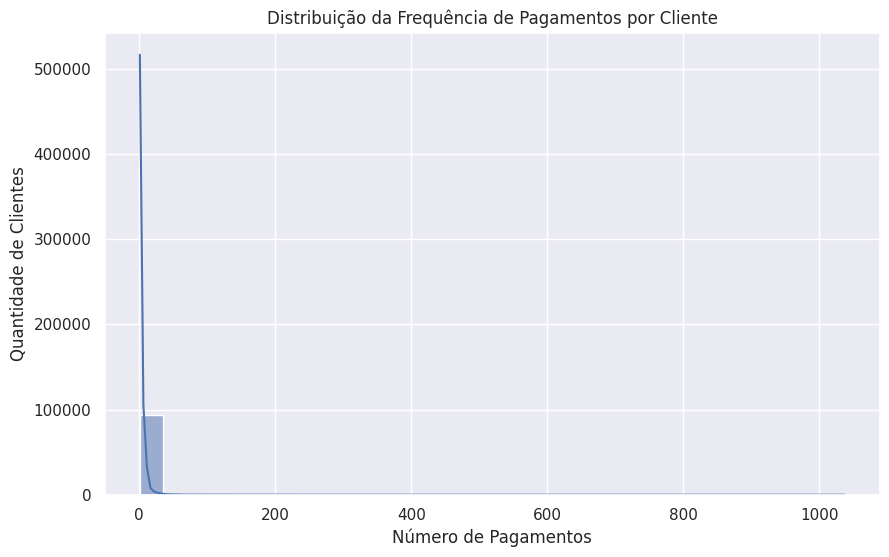

In [317]:
# Frequência de pagamentos por cliente
payment_counts = payments_df["customer_id"].value_counts()

# Visualizando a distribuição
plt.figure(figsize=(10, 6))
sns.histplot(payment_counts, bins=30, kde=True)
plt.title("Distribuição da Frequência de Pagamentos por Cliente")
plt.xlabel("Número de Pagamentos")
plt.ylabel("Quantidade de Clientes")
plt.show()

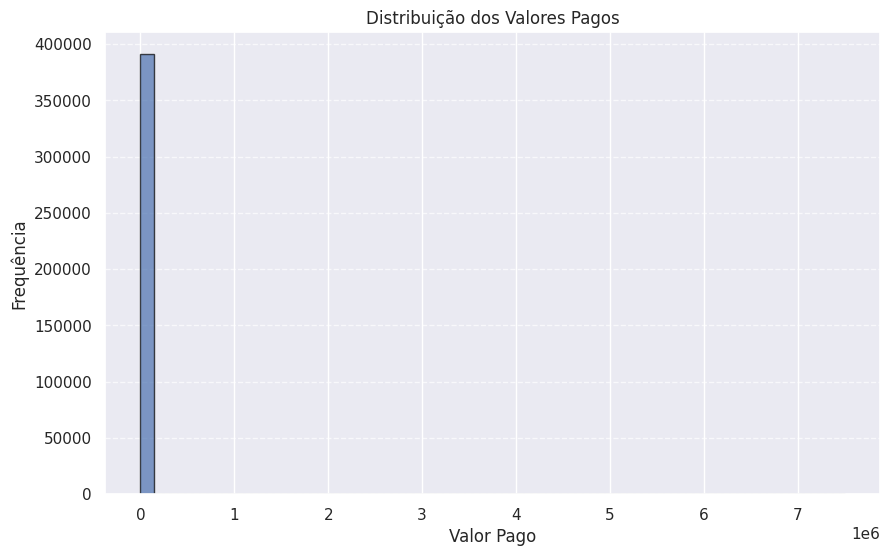

In [318]:
# Analisando a distribuição dos valores pagos
plt.figure(figsize=(10, 6))
plt.hist(payments_df["paid_amount"].dropna(), bins=50, edgecolor="black", alpha=0.7)
plt.title("Distribuição dos Valores Pagos")
plt.xlabel("Valor Pago")
plt.ylabel("Frequência")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

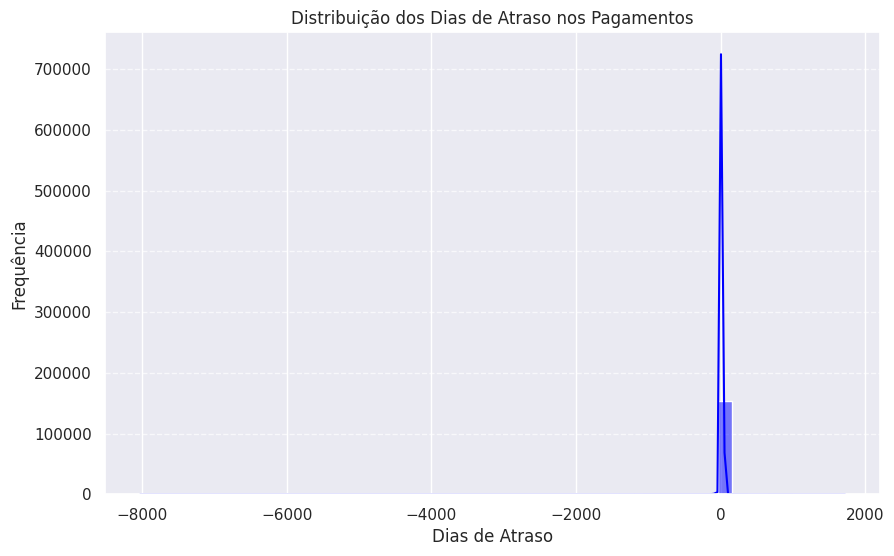

In [319]:
# Analisando a distribuição dos dias de atraso (delay_days)
plt.figure(figsize=(10, 6))
sns.histplot(payments_df["delay_days"], bins=50, kde=True, color="blue")
plt.title("Distribuição dos Dias de Atraso nos Pagamentos")
plt.xlabel("Dias de Atraso")
plt.ylabel("Frequência")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Distribuição dos Dias de Atraso (`delay_days`)**:
   - A maioria dos pagamentos ocorre dentro do prazo ou com pequenos atrasos.
   - Há um número significativo de pagamentos com grandes atrasos, o que pode indicar um problema recorrente de inadimplência.

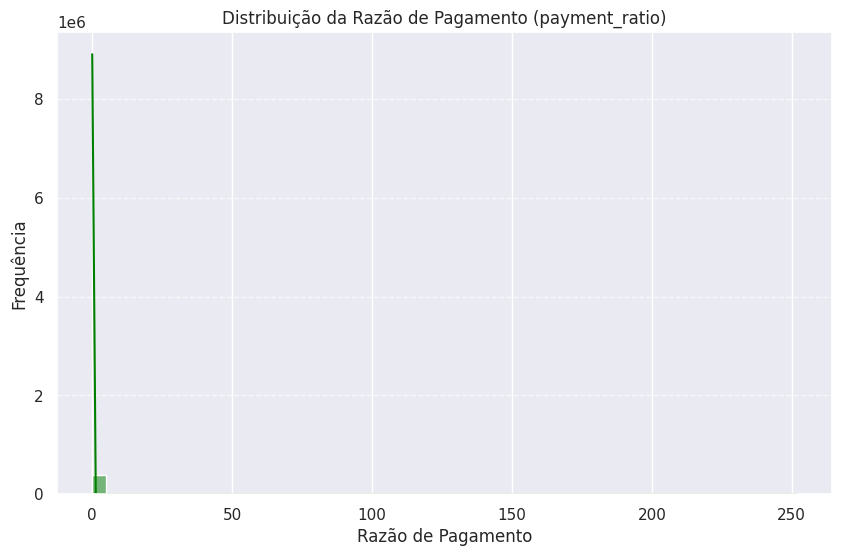

In [320]:
# Analisando a distribuição da taxa de pagamento (payment_ratio)
plt.figure(figsize=(10, 6))
sns.histplot(payments_df["payment_ratio"].dropna(), bins=50, kde=True, color="green")
plt.title("Distribuição da Razão de Pagamento (payment_ratio)")
plt.xlabel("Razão de Pagamento")
plt.ylabel("Frequência")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Distribuição da Razão de Pagamento (`payment_ratio`)**:
   - A maioria dos clientes paga 100% do valor devido (`payment_ratio = 1`).
   - Alguns clientes pagam valores parciais, sugerindo possíveis dificuldades financeiras ou renegociações.

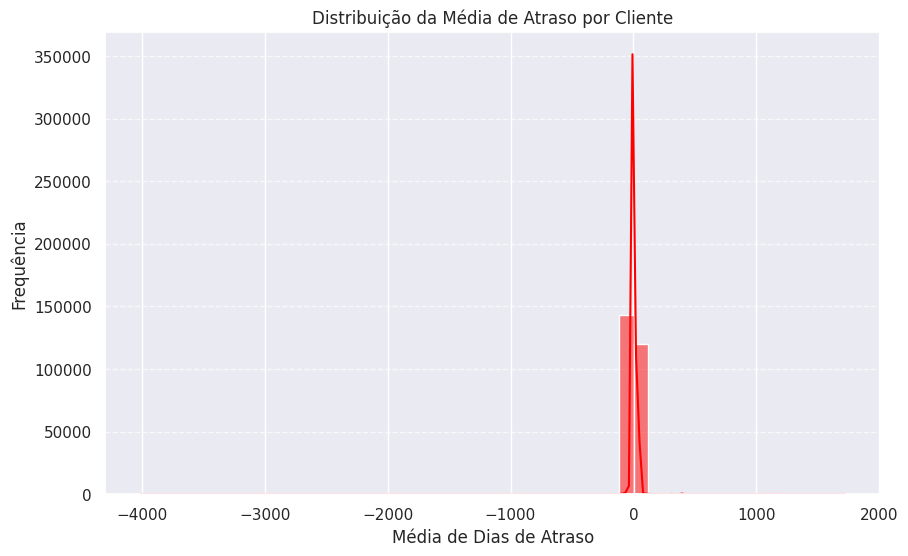

In [321]:
# Analisando a média de atraso por cliente
plt.figure(figsize=(10, 6))
sns.histplot(payments_df["avg_delay_per_customer"].dropna(), bins=50, kde=True, color="red")
plt.title("Distribuição da Média de Atraso por Cliente")
plt.xlabel("Média de Dias de Atraso")
plt.ylabel("Frequência")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Distribuição da Média de Atraso por Cliente (`avg_delay_per_customer`)**:
   - A maioria dos clientes tem um pequeno atraso médio ou paga no prazo.
   - Alguns clientes apresentam grandes médias de atraso, indicando um perfil de risco para inadimplência.

#### Proposta de Categorias para Classificação dos Pagadores

Com base na análise exploratória dos dados e nos insights obtidos, podemos segmentar os clientes (pagadores) em categorias que reflitam seus comportamentos de pagamento. Essa segmentação auxiliará na definição de estratégias de cobrança e reengajamento.


In [322]:
# Função para atribuir categorias com base nos critérios definidos:
def classify_customer(row):
    # Novos Pagadores: poucos registros (menos de 3 cobranças)
    if row["total_payments"] < 3:
        return "Novos Pagadores"
    # Bons Pagadores: nenhum atraso registrado
    if row["late_rate"] == 0:
        return "Bons Pagadores"
    # Maus Pagadores: alta taxa de atraso (acima de 70%)
    elif row["late_rate"] > 0.7:
        return "Maus Pagadores"
    # Pagadores Esquecidos: taxa de atraso entre 30% e 70%
    elif row["late_rate"] > 0.3:
        return "Pagadores Esquecidos"
    # Pagadores Duvidosos: taxa de atraso baixa (0 < atraso <= 30%)
    else:
        return "Pagadores Duvidosos"


# Aplicando a função de classificação em cada linha do dataframe agregado
payments_df["customer_category"] = payments_df.apply(classify_customer, axis=1)

payments_df["customer_category"]

0             Novos Pagadores
1             Novos Pagadores
2         Pagadores Duvidosos
3             Novos Pagadores
4         Pagadores Duvidosos
                 ...         
391253         Maus Pagadores
391254        Novos Pagadores
391255        Novos Pagadores
391256        Novos Pagadores
391257        Novos Pagadores
Name: customer_category, Length: 391258, dtype: object

#### Explicação dos Critérios e Lógica

- **Novos Pagadores** → Menos de 3 registros de cobrança  
- **Bons Pagadores** → Nenhum atraso registrado  
- **Maus Pagadores** → Taxa de atraso acima de 70%  
- **Pagadores Esquecidos** → Taxa de atraso entre 30% e 70%  
- **Pagadores Duvidosos** → Taxa de atraso baixa (0 < atraso ≤ 30%)  

In [323]:
# Verificando a distribuição das novas categorias
payments_df["customer_category"].value_counts(normalize=True)

customer_category
Novos Pagadores         0.624460
Maus Pagadores          0.123560
Bons Pagadores          0.121695
Pagadores Esquecidos    0.074695
Pagadores Duvidosos     0.055590
Name: proportion, dtype: float64

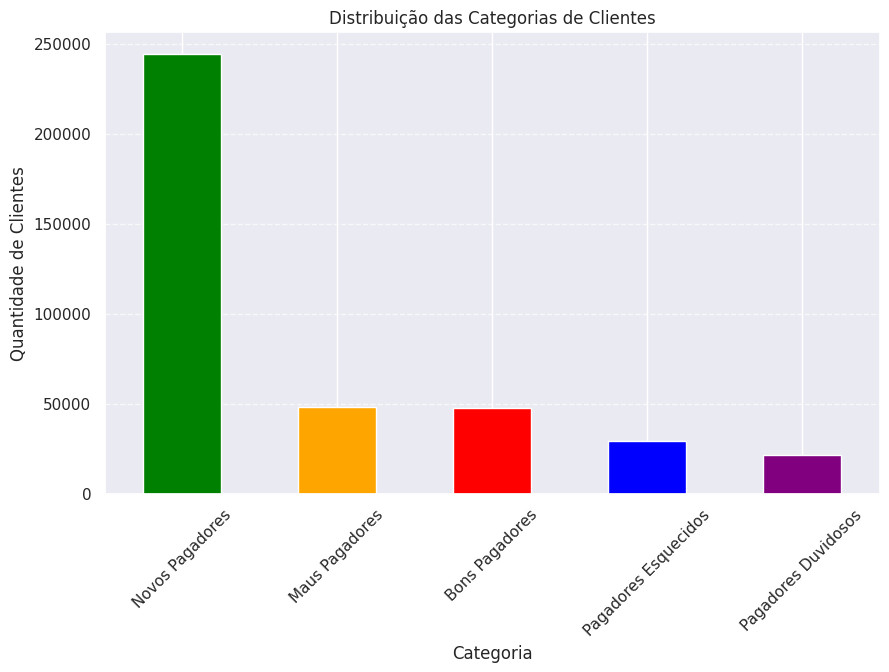

In [324]:
# Contagem de clientes por categoria
category_counts = payments_df["customer_category"].value_counts()

# Exibir a distribuição das categorias
plt.figure(figsize=(10, 6))
category_counts.plot(kind="bar", color=["green", "orange", "red", "blue", "purple"])
plt.title("Distribuição das Categorias de Clientes")
plt.xlabel("Categoria")
plt.ylabel("Quantidade de Clientes")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Distribuição da frequência de pagamentos por cliente:
count    94583.000000
mean         4.136663
std          9.046217
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max       1037.000000
Name: count, dtype: float64


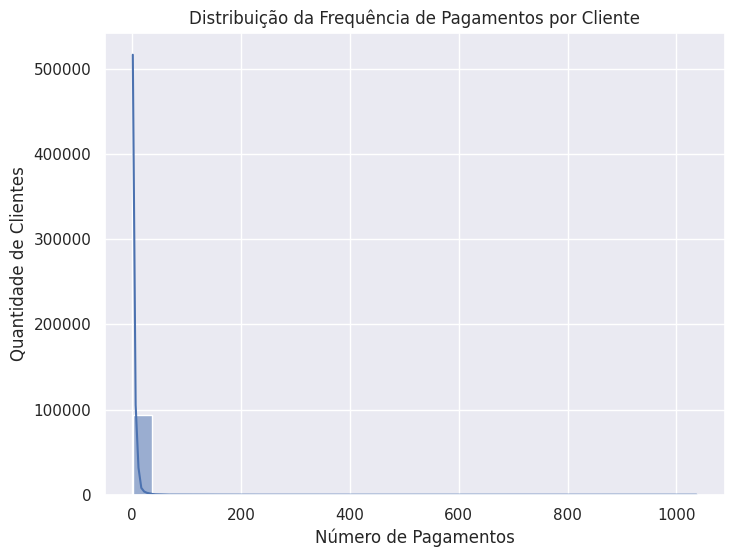

In [325]:
# Frequência de pagamentos por cliente
payment_counts = payments_df["customer_id"].value_counts()
print("Distribuição da frequência de pagamentos por cliente:")
print(payment_counts.describe())

# Visualizando a distribuição
plt.figure(figsize=(8, 6))
sns.histplot(payment_counts, bins=30, kde=True)
plt.title("Distribuição da Frequência de Pagamentos por Cliente")
plt.xlabel("Número de Pagamentos")
plt.ylabel("Quantidade de Clientes")
plt.show()

In [326]:
# Cruzando os dados dos pagamentos com as informações das empresas
merged_df = payments_df.merge(companies_df, on="company_id", how="left")

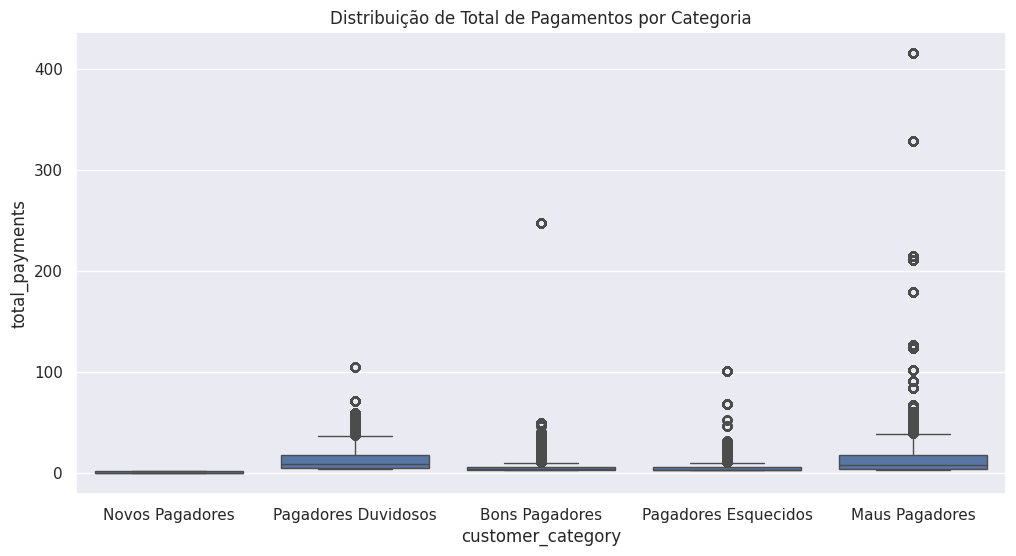

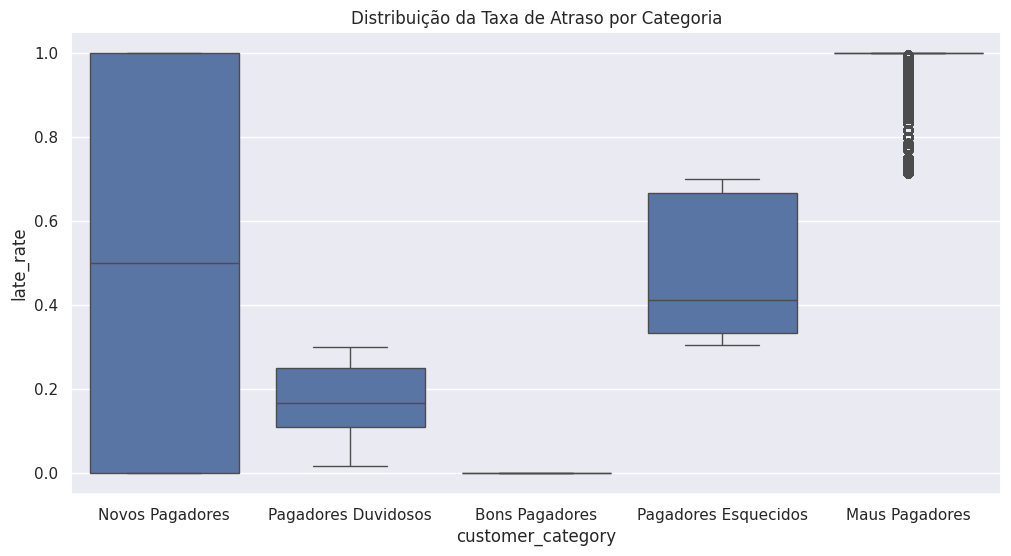

In [327]:
import seaborn as sns

# Criando gráficos de distribuição para as variáveis mais importantes
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_df["customer_category"], y=merged_df["total_payments"])
plt.title("Distribuição de Total de Pagamentos por Categoria")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_df["customer_category"], y=merged_df["late_rate"])
plt.title("Distribuição da Taxa de Atraso por Categoria")
plt.show()

---
## **Preparação dos Dados**

Para preparar os dados para a construção do modelo, vamos usar a classe `LabelEncoder` para transformar variáveis categóricas em forma de texto como `payment_provider`, `paid_method` e a variavel alvo `customer_category` em números, para facilitar a visualização.  

Em seguida, essas variáveis serão agrupadas com as demais variáveis categorias e todas elas serão transformadas através método OneHotEncoder().

In [328]:
cols_encode = ["payment_provider", "paid_method"]
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), cols_encode), remainder="passthrough"
)

df_train_encode = one_hot_enc.fit_transform(merged_df)
df_train_encode = pd.DataFrame(
    df_train_encode, columns=one_hot_enc.get_feature_names_out()
)

df_train_encode.columns = df_train_encode.columns.str.replace(
    "remainder__", ""
).str.replace("onehotencoder__", "")

df_train_encode["customer_category"] = df_train_encode["customer_category"].map(
    {
        "Novos Pagadores": 0,
        "Pagadores Duvidosos": 1,
        "Bons Pagadores": 2,
        "Pagadores Esquecidos": 3,
        "Maus Pagadores": 4,
    }
)

with open("../models/modelo_onehotenc.pkl", "wb") as file:
    pickle.dump(one_hot_enc, file)

*O* próximo passo seria dividir o `dataset` em treino e teste e padronizar os dados utilizando a classe `StandardScaler`, mas como temos uma base de treinamento desbalanceada, vamos usar a função `resample` para criar um *dataset* balanceado e repetir, neste novo *dataset*, o mesmo processo de padronização dos dados. Em seguida, vamos verificar o balanceamento.

customer_category
0    271114
4    114901
2     74705
3     47256
1     34252
Name: count, dtype: int64 



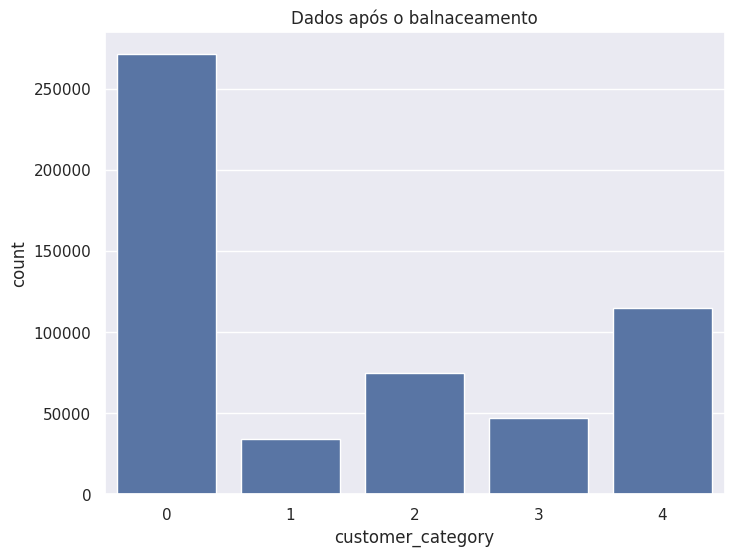

In [329]:
# Criando o dataset balanceado
maioria = df_train_encode[df_train_encode["customer_category"] == 0]
minoria = df_train_encode[df_train_encode["customer_category"] != 0]

minoria_balanceada = resample(minoria, replace=True, n_samples=len(maioria))

df_balanceado = pd.concat([maioria, minoria_balanceada])

# Verificando o balanceamento
print(df_balanceado["customer_category"].value_counts(), "\n")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(df_balanceado, x="customer_category")
ax.set_title("Dados após o balnaceamento")
plt.show()

---
## **Machine Learning**

Vamos usar quatro algoritmos diferentes para treinar modelos:
* [Regressão Logística](https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica);
* [Árvores de Decisão](https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69);
* [Random Forest](https://en.wikipedia.org/wiki/Random_forest);
* [XGBoost](https://pt.wikipedia.org/wiki/Xgboost).

Usando a técnica de [validação cruzada](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada#:~:text=A%20valida%C3%A7%C3%A3o%20cruzada%20%C3%A9%20uma,da%20modelagem%20%C3%A9%20a%20predi%C3%A7%C3%A3o.), vamos ver o desempenho desses quatro algoritmos tanto com os dados balanceados, como com os dados desbalanceados e, portando, teremos dez modelos.
Usaremos a seguinte [métrica](https://www.mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/) para avaliar os modelos:

* Acurácia;

Em seguida, vamos gerar um DataFrame com os resultados de cada um dos modelos para facilitar a visualização e a escolha do melhor modelo.

In [345]:
# Criando a variável alvo (target) - Categoria de Pagador
target = "customer_category"
features = [
    "total_payments",
    "late_rate",
    "late_payments",
    "customer_payment_count",
    "avg_delay",
    "avg_time_to_pay",
    "time_to_pay",
    "delay_days",
]

df_train_encode = df_train_encode.dropna(subset=features + [target])[features + [target]]

X = df_train_encode.drop("customer_category", axis=1)
y = df_train_encode["customer_category"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

df_balanceado = df_balanceado.dropna(subset=features + [target])[features + [target]]

X_balanceado = df_balanceado.drop("customer_category", axis=1)
y_balanceado = df_balanceado["customer_category"]

X_train_balanceado, X_test_balanceado, y_train_balanceado, y_test_balanceado = (
    train_test_split(X_balanceado, y_balanceado)
)

scaler_balanceado = StandardScaler()
scaler_balanceado.fit(X_train_balanceado)
X_train_balanceado = scaler_balanceado.transform(X_train_balanceado)
X_test_balanceado = scaler_balanceado.transform(X_test_balanceado)

In [347]:
# Criando os modelos utilizando validação cruzada
logreg_balanceado = cross_validate(
    LogisticRegression(solver="liblinear"),
    X_train_balanceado,
    y_train_balanceado,
    cv=5,
    scoring=["accuracy", "precision_micro", "recall_micro", "roc_auc_ovo", "f1_micro"],
)
logreg = cross_validate(
    LogisticRegression(solver="liblinear"),
    X_train,
    y_train,
    cv=5,
    scoring=["accuracy", "precision_micro", "recall_micro", "roc_auc_ovo", "f1_micro"],
)

trees_balanceado = cross_validate(
    DecisionTreeClassifier(),
    X_train_balanceado,
    y_train_balanceado,
    cv=5,
    scoring=["accuracy", "precision_micro", "recall_micro", "roc_auc_ovo", "f1_micro"],
)
trees = cross_validate(
    DecisionTreeClassifier(),
    X_train,
    y_train,
    cv=5,
    scoring=["accuracy", "precision_micro", "recall_micro", "roc_auc_ovo", "f1_micro"],
)

forest_balanceado = cross_validate(
    RandomForestClassifier(),
    X_train_balanceado,
    y_train_balanceado,
    cv=5,
    scoring=["accuracy", "precision_micro", "recall_micro", "roc_auc_ovo", "f1_micro"],
)
forest = cross_validate(
    RandomForestClassifier(),
    X_train,
    y_train,
    cv=5,
    scoring=["accuracy", "precision_micro", "recall_micro", "roc_auc_ovo", "f1_micro"],
)

xgb_balanceado = cross_validate(
    XGBClassifier(),
    X_train_balanceado,
    y_train_balanceado,
    cv=5,
    scoring=["accuracy", "precision_micro", "recall_micro", "roc_auc_ovo", "f1_micro"],
)
xgb = cross_validate(
    XGBClassifier(),
    X_train,
    y_train,
    cv=5,
    scoring=["accuracy", "precision_micro", "recall_micro", "roc_auc_ovo", "f1_micro"],
)

# Gerando um DataFrame com os resultados de cada modelo
summary = pd.DataFrame(
    {
        "labels": ["accuracy", "precision_micro", "recall_micro", "roc_auc_ovo", "f1_micro"],
        "logreg_balanceado": [
            logreg_balanceado["test_accuracy"].mean(),
            logreg_balanceado["test_precision_micro"].mean(),
            logreg_balanceado["test_recall_micro"].mean(),
            logreg_balanceado["test_roc_auc_ovo"].mean(),
            logreg_balanceado["test_f1_micro"].mean(),
        ],
        "logreg": [
            logreg["test_accuracy"].mean(),
            logreg["test_precision_micro"].mean(),
            logreg["test_recall_micro"].mean(),
            logreg["test_roc_auc_ovo"].mean(),
            logreg["test_f1_micro"].mean(),
        ],
        "trees_balanceado": [
            trees_balanceado["test_accuracy"].mean(),
            trees_balanceado["test_precision_micro"].mean(),
            trees_balanceado["test_recall_micro"].mean(),
            trees_balanceado["test_roc_auc_ovo"].mean(),
            trees_balanceado["test_f1_micro"].mean(),
        ],
        "trees": [
            trees["test_accuracy"].mean(),
            trees["test_precision_micro"].mean(),
            trees["test_recall_micro"].mean(),
            trees["test_roc_auc_ovo"].mean(),
            trees["test_f1_micro"].mean(),
        ],
        "forest_balanceado": [
            forest_balanceado["test_accuracy"].mean(),
            forest_balanceado["test_precision_micro"].mean(),
            forest_balanceado["test_recall_micro"].mean(),
            forest_balanceado["test_roc_auc_ovo"].mean(),
            forest_balanceado["test_f1_micro"].mean(),
        ],
        "forest": [
            forest["test_accuracy"].mean(),
            forest["test_precision_micro"].mean(),
            forest["test_recall_micro"].mean(),
            forest["test_roc_auc_ovo"].mean(),
            forest["test_f1_micro"].mean(),
        ],
        "xgb_balanceado": [
            xgb_balanceado["test_accuracy"].mean(),
            xgb_balanceado["test_precision_micro"].mean(),
            xgb_balanceado["test_recall_micro"].mean(),
            xgb_balanceado["test_roc_auc_ovo"].mean(),
            xgb_balanceado["test_f1_micro"].mean(),
        ],
        "xgb": [
            xgb["test_accuracy"].mean(),
            xgb["test_precision_micro"].mean(),
            xgb["test_recall_micro"].mean(),
            xgb["test_roc_auc_ovo"].mean(),
            xgb["test_f1_micro"].mean(),
        ],
    }
).set_index("labels")
summary.index.name = None
summary = summary.transpose()
summary.style.map(lambda x: "background-color: lightgreen" if x >= 0.95 else "")

/home/gerson/.cache/pypoetry/virtualenvs/neofin-machine-learning-engineer-challenge-wGnavEa_-py3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/gerson/.cache/pypoetry/virtualenvs/neofin-machine-learning-engineer-challenge-wGnavEa_-py3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/gerson/.cache/pypoetry/virtualenvs/neofin-machine-learning-engineer-challenge-wGnavEa_-py3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/gerson/.cache/pypoetry/virtualenvs/neofin-machine-learning-engineer-challenge-wGnavEa_-py3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number 

,accuracy,precision_micro,recall_micro,roc_auc_ovo,f1_micro
logreg_balanceado,0.885503,0.885503,0.885503,0.965143,0.885503
logreg,0.873877,0.873877,0.873877,0.963907,0.873877
trees_balanceado,1.000000,1.000000,1.000000,1.000000,1.000000
trees,1.000000,1.000000,1.000000,1.000000,1.000000
forest_balanceado,1.000000,1.000000,1.000000,1.000000,1.000000
forest,1.000000,1.000000,1.000000,1.000000,1.000000
xgb_balanceado,1.000000,1.000000,1.000000,1.000000,1.000000
xgb,1.000000,1.000000,1.000000,1.000000,1.000000


De uma forma geral, tanto os dados balanceados quando os dados não balanceados apresentaram melhores resultados considerando a métrica utilizada. Dentre os algoritmos, todos apresentaram bons resultados similares e foi escolido o ***`Random Forests`***, portanto, a combinação desse modelo com os dados não balanceados é a escolhida para este desafio.

In [337]:
import joblib

target = "customer_category"
features = [
    "total_payments",
    "late_rate",
    "late_payments",
    "customer_payment_count",
    "avg_delay",
    "avg_time_to_pay",
    "time_to_pay",
    "delay_days",
]

df_train_encode = df_train_encode.dropna(subset=features + [target])[features + [target]]

# Transformando a variável alvo em numérica (OneHotEncoder)
target_encoder = OneHotEncoder()
X = df_train_encode.drop("customer_category", axis=1)
y = target_encoder.fit_transform(df_train_encode[["customer_category"]]).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Salvando o OneHotEncoder para uso futuro
joblib.dump(target_encoder, "../models/target_encoder.pkl")

# Criando um pipeline para normalização e modelagem
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),  # Normaliza os dados
        ("classifier", RandomForestClassifier(n_estimators=100, random_state=42)),  # Modelo
    ]
)

# Treinando o pipeline
pipeline.fit(X_train, y_train)

# Fazendo previsões
y_pred_updated = pipeline.predict(X_test)

# Avaliando o modelo
updated_accuracy = pipeline.score(X_test, y_test)
print(f"Acurácia do Modelo com Pipeline: {updated_accuracy:.4f}")

accuracy = accuracy_score(y_test, y_pred_updated)
recall = recall_score(y_test, y_pred_updated, average="weighted")
f1 = f1_score(y_test, y_pred_updated, average="weighted")
class_report = classification_report(y_test, y_pred_updated)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Classification Report:\n{class_report}")

# Salvando o modelo treinado
joblib.dump(pipeline, "../models/customer_classification_pipeline.pkl")
print("Modelo salvo como 'customer_classification_pipeline.pkl'")

Acurácia do Modelo com Pipeline: 1.0000
Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14041
           1       1.00      1.00      1.00      2480
           2       1.00      1.00      1.00      6230
           3       1.00      1.00      1.00      3957
           4       1.00      1.00      1.00      8302

   micro avg       1.00      1.00      1.00     35010
   macro avg       1.00      1.00      1.00     35010
weighted avg       1.00      1.00      1.00     35010
 samples avg       1.00      1.00      1.00     35010

Modelo salvo como 'customer_classification_pipeline.pkl'


## **Conclusão**

Neste desafio, trabalhamos com um problema de identificação de customer com o objetivo de construir um modelo de *machine learning* capaz de identificar possíveis perfis. Para isso, passo pelas seguintes etapas:

* Exploração e limpeza dos dados;
* Análise dos dados e *feature engineering*;
* Preparação dos dados para *machine learning*;
* Seleção do algoritmo;
* Ajuste, treinamento e avaliação de um modelo de *machine learning*.

Como resultado, além de alguns *insights* relevantes sobre o impacto de algumas características na variável alvo, foi construído um modelo preditivo que demonstrou acurácia de 99%, sendo considerado um resultado satisfatório e, portando, cumprindo o objetivo inicialmente proposto.

Caso tenha alguma dúvida, sugestão ou feedback, sinta-se à vontade para entrar em contato via [GitHub](https://github.com/GersonRS) ou [Linkedin](https://www.linkedin.com/in/gersonrsantos/).


In [338]:
import joblib

# Carregar o pipeline treinado
pipeline = joblib.load("../models/customer_classification_pipeline.pkl")

# Obter a lista de features usadas no treinamento
features_used_in_training = pipeline["scaler"].get_feature_names_out()

print("Features usadas no treinamento:", features_used_in_training)

Features usadas no treinamento: ['total_payments' 'late_rate' 'late_payments' 'customer_payment_count'
 'avg_delay' 'avg_time_to_pay' 'time_to_pay' 'delay_days']
